# Introduction to Artificial Neural Networks  with Keras

# From Biological to Artificial Neurons

### 1 )There is now a huge quantity of data available to train neural networks, and ANNs frequently outperform other ML techniques on very large and complex problems.s.

### 2) The tremendous increase in computing power since the 1990s now makes it possible to train large neural networks in a reasonable amount of time.

### 3) This is in part due to Moore’s law (the number of components in integrated circuits has doubled about every 2 years over the last 50 years), but also thanks to the gaming industry, which has stimulated the production of powerful GPU cards by the millions. 

### 4) The training algorithms have been improved. To be fair they are only slightly different from the ones used in the 1990s, but these relatively small tweaks have had a huge positive impact.

### 5) Some theoretical limitations of ANNs have turned out to be benign in practice. For example, many people thought that ANN training algorithms were doomed because they were likely to get stuck in local optima, but it turns out that this is rather rare in practice (and when it is the case, they are usually fairly close to the global optimum).

### 6) ANNs seem to have entered a virtuous circle of funding and progress. Amazing products based on ANNs regularly make the headline news, which pulls more and more attention and funding toward them,resulting in more and more progress and even more amazing products.

# The Perceptron

It is based on a slightly different artificial neuron called a threshold logic unit (TLU), or sometimes a linear threshold unit (LTU). The inputs and output are numbers (instead of binary on/off values), and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs (z = w1x1+ w2x2 + ⋯ + wnxn = x⊺ w), then applies a step function to that sum and outputs the result: hw(x) = step(z), where z = x⊺ w.

#### The most common step function used in Perceptrons is the Heaviside step function. Sometimes the sign function is used instead.

 heaviside z = 0 if z < 0 ,1 if z ≥ 0 
 
 sgn z =  −1 if z < 0 ,0 if z=0 ,+1 if z > 0

A single TLU can be used for simple linear binary classification. It computes a linear
 combination of the inputs, and if the result exceeds a threshold, it outputs the posi
tive class. Otherwise it outputs the negative class (just like a Logistic Regression or
 linear SVM classifier). 

#### Training a TLU means finding the right values for w0, w1, and w2 

A Perceptron is simply composed of a single layer of TLUs,7 with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer (i.e., its input neurons), the layer is called a fully connected layer, or a dense layer. 

The inputs of the Perceptron are fed to special passthrough neurons called input neurons: they output whatever input they are fed. All the input neurons form the input layer. Moreover, an extra bias feature is generally added (x0 = 1): it is typically represented using a special type of neuron called a bias neuron, which outputs 1 all the time.

#### IMPORTANT:  Computing the outputs of a fully connected layer
ϕ(XW+b) (explanation of terms is there in the notebook)

## Training algorithm of Perceptron

Perceptrons are trained using a rule that takes into account the error made by the network when it makes a prediction; Perceptron learning rule reinforces connections that help reduce the error. More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.

For the line "For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction." What this means is that suppose if for an input the output given by perceptron was wrong, then in that case we update the weight, which basically means reinforcing, i.e. we increase/decrease the weight values for the inputs that got classified as incorrect. NOTE: I think this line should have been written as "For every output neuron that produced a wrong prediction, it reinforces the connection weights FOR  the inputs that would have contributed to the correct prediction.""

#### Perceptron Weight Update
W(i, jnext step) = w(i, j) + η(yj − y)
Explanation of terms in notebook

#### Perceptron Convergance Theorem
The decision boundary of each output neuron is linear, so Perceptrons are incapable of learning complex patterns (just like Logistic Regression classifiers). However, if the training instances are linearly separable, Rosenblatt demonstrated that this algorithm would converge to a solution.8 This is called the Perceptron convergence theorem.


### Perceptron Using Scikit-Learn

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(int)  # Iris setosa

In [3]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [4]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

#### NOTE
You may have noticed that the Perceptron learning algorithm strongly resembles Stochastic Gradient Descent, remember how Stochastic Gradient Descent deals with one input value at a time . In fact, Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: loss="perceptron", learning_rate="constant", eta0=1 (the learning rate), and penalty=None (no regularization).

# The Multilayer Perceptron and Backpropagation

#### Architecture
An MLP is composed of one (passthrough) input layer, one or more layers of TLUs, called hidden layers, and one final layer of TLUs called the output layer. The layers close to the input layer are usually called the lower layers, and
 the ones close to the outputs are usually called the upper layers. Every layer except the
 output layer includes a bias neuron and is fully connected to the next laye The signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a feedforward neural network (FNN).r.

## Backpropagation training algorithm
In short, it is Gradient Descent using an efficient technique for computing the gradients automatically:in just two
passes through the network (one forward, one backward), the backpropagation algorithm is able to compute the gradient of the network’s error with regard to every single model parameter. In other words, it can find out how each connection weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

### STEP 1:-  It handles one mini-batch at a time (for example, containing 32 instances each),and it goes through the full training set multiple times. Each pass is called an epoch.

### STEP 2:- Each mini-batch is passed to the network’s input layer, which sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.

### STEP 3:- Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).

### STEP 4:- Then it computes how much each output connection contributed to the error. This is done analytically by applying the chain rule (perhaps the most fundamental rule in calculus), which makes this step fast and precise.

## Important, see notebook part "chain rule"

### STEP 5:- The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule, working backward until the algorithm reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network (hence the name of the algorithm).

### STEP 6:- Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

### SUMMARY of the Algorithm
for each training instance, the backpropagation algorithm first makes a prediction (forward pass) and measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally tweaks the connection weights to reduce the error (Gradient Descent step).

#### Autodiff
Automatically computing gradients is called automatic differentiation, or autodiff. There are various autodiff techniques, with different pros and cons. The one used by backpropagation is called reverse-mode autodiff. It is fast and precise, and is well suited when the function to differentiate has many variables (e.g., connection weights) and few outputs (e.g., one loss).

## Why do we need activation functions 
If you chain several linear transformations, all you get is a linear transformation. For example, if f(x) = 2x + 3 and g(x) = 5x – 1, then chaining these two linear functions gives you another linear function: f(g(x)) = 2(5x – 1) + 3 = 10x + 1. So if you don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and you can’t solve very complex problems with that. Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.

## Regression MLPs

NOTE :- see Table 10-1. Typical regression MLP architecture from the Textbook 

First, MLPs can be used for regression tasks. If you want to predict a single value (e.g., the price of a house, given many of its features), then you just need a single output neuron: its output is the predicted value. For multivariate regression (i.e., to predict multiple values at once), you need one output neuron per output dimension. For example, to locate the center of an object in an image, you need to predict 2D coordinates, so you need two output neurons. If you also want to place a bounding box around the object, then you need two more numbers: the width and the height of the object. So, you end up with four output neurons.

In general, when building an MLP for regression, you do not want to use any activation function for the output neurons, so they are free to output any range of values. If you want to guarantee that the output will always be positive, then you can use the ReLU activation function in the output layer. Alternatively, you can use the softplus activation function, which is a smooth variant of ReLU: softplus(z) = log(1 + exp(z)). It is close to 0 when z is negative, and close to z when z is positive. Finally, if you want to guarantee that the predictions will fall within a given range of values, then you can use the logistic function or the hyperbolic tangent, and then scale the labels to the appropriate range: 0 to 1 for the logistic function and –1 to 1 for the hyperbolic tangent.

The loss function to use during training is typically the mean squared error, but if you The Huber loss is quadratic when the error is smaller than a threshold δ (typically 1) but linear when the error is larger than δ. The linear part makes it less sensitive to outliers than the mean squared error, and the quadratic part allows it to converge faster and be more precise than the mean absolute error.have a lot of outliers in the training set, you may prefer to use the mean absolute error instead. Alternatively, you can use the Huber loss, which is a combination of both.

## Classification MLPs

MLPs can also be used for classification tasks. For a binary classification problem, you just need a single output neuron using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. The estimated probability of the negative class is equal to one minus that number.

MLPs can also easily handle multilabel binary classification tasks (see Chapter 3). For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or nonurgent email. In this case, you would need two output neurons, both using the logistic activation function: the first would output the probability that the email is spam, and the second would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. Note that the output probabilities do not necessarily add up to 1. This lets the model output any combination of labels: you can have nonurgent ham, urgent ham, nonurgent spam, and perhaps even urgent spam (although that would probably be an error).

If each instance can belong only to a single class, out of three or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the whole output layer. The softmax function (introduced in Chapter 4)will ensure that all the estimated probabilities are between 0 and 1 and that they add up to 1 (which is required if the classes are exclusive). This is called multiclass classification.

Regarding the loss function, since we are predicting probability distributions, the cross-entropy loss (also called the log loss, see Chapter 4) is generally a good choice.

# Implementing MLPs with Keras

Keras is a high-level Deep Learning API that allows you to easily build, train, evaluate, and execute all sorts of neural networks.

To perform the heavy computations required by neural networks, this reference implementation relies on a computation backend. At present, you can choose from three popular open source Deep Learning libraries:TensorFlow, Microsoft Cognitive Toolkit (CNTK), and Theano.

Since late 2016, other implementations have been released. You can now run Keras on Apache MXNet, Apple’s Core ML, JavaScript or TypeScript (to run Keras code in a web browser), and PlaidML (which can run on all sorts of GPU devices, not just Nvidia).

Moreover, TensorFlow itself now comes bundled with its own Keras implementation, tf.keras. It only supports TensorFlow as the backend, but it has the advantage of offering some very useful extra features: for example, it supports TensorFlow’s Data API, which makes it easy to load and preprocess data efficiently.


In [5]:
import tensorflow as tf

In [6]:
from tensorflow import keras

In [7]:
tf.__version__

'2.15.0'

In [8]:
keras

<KerasLazyLoader (keras_2) keras.api._v2.keras as keras mode=None>

# Building an Image Classifier Using the Sequential API

First, we need to load a dataset. In this chapter we will tackle Fashion MNIST, which is a drop-in replacement of MNIST (introduced in Chapter 3). It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem turns out to be significantly more challenging than MNIST. For example, a simple linear model reaches about 92% accuracy on MNIST, but only about 83% on Fashion MNIST.

## Using Keras to load the dataset

Keras provides some utility functions to fetch and load common datasets, including MNIST, Fashion MNIST, and the California housing dataset we used in Chapter 2. Let’s load Fashion MNIST:

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\Python 3.11\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [10]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
X_train_full.shape

(60000, 28, 28)

In [13]:
X_train_full[0].shape

(28, 28)

#### Important Note
When loading MNIST or Fashion MNIST using Keras rather than Scikit-Learn, one important difference is that every image is represented as a 28 × 28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0). Let’s take a look at the shape and data type of the training set:

In [14]:
X_train_full.dtype

dtype('uint8')

### Dataset Processing

Note that the dataset is already split into a training set and a test set, but there is no validation set, so we’ll create one now. Additionally, since we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0 (this also converts them to floats):

In [15]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [16]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#### Class Labels

With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. Easy. For Fashion MNIST, however, we need the list of class names to know what we are dealing with:

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
y_train[4]

9

In [19]:
class_names[y_train[4]]

'Ankle boot'

## Creating the model using the Sequential API

Now let’s build the neural network! Here is a classification MLP with two hidden 
layers:

In [20]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

## Understanding the model

## 1) The first line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API.

## 2) Next, we build the first layer and add it to the model. It is a Flatten layer whose role is to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1, 1). This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the input_shape, which doesn’t include the batch size, only the shape of the instances. Alternatively, you could add a keras.layers.InputLayer as the first layer, setting input_shape=[28,28].

Note:- Why the reshape is (-1,1) because (-1,1) means give me an array of any number of rows but only 1 column i.e. an array of shape (784,1) in our case

In [21]:
X_check= X_valid[0].reshape(-1,1)
X_check.shape

(784, 1)

In [22]:
X_check= X_valid[0].reshape(1,-1)
X_check.shape

(1, 784)

## 3) Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes the equation shown below

#### IMPORTANT:  Computing the outputs of a fully connected layer
h((W, b))(
)X =ϕ(XW+b) (explanation of terms is there in the notebook)

## 4) Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function.

## 5) Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function (because the classes are mutually exclusive).

### Instead of adding the layers one by one as we just did, you can pass a list of layers when creating the Sequential model:

In [23]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])


## Model Summary

The model’s summary() method displays all the model’s layers,14 including each layer’s name (which is automatically generated unless you set it when creating the layer), its output shape (None means the batch size can be anything), and its number of parameters. The summary ends with the total number of parameters, including trainable and non-trainable parameters.

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


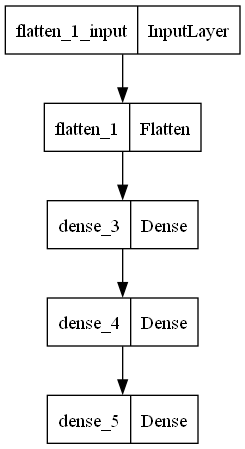

In [25]:
keras.utils.plot_model(model)

## NOTE:-
The Dense layers often have a lot of parameters. For example, the first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters! This gives the model quite a lot of flexibility to fit the training data, but it also means that the model runs the risk of overfitting, especially when you do not have a lot of training data.

In [26]:
model.layers

In [27]:
hidden_1 = model.layers[1]
hidden_1


## Model Parameters, Weights

All the parameters of a layer can be accessed using its get_weights() and set_weights() methods. For a Dense layer, this includes both the connection weights and the bias terms:

In [28]:
model.get_weights()

[array([[-0.03590026, -0.03438793, -0.0164454 , ..., -0.00143368,
         -0.07133218, -0.00539531],
        [ 0.0608772 ,  0.00885334,  0.01763325, ...,  0.01980945,
         -0.02433419, -0.00415098],
        [ 0.01789536, -0.03813708,  0.0546574 , ...,  0.03119663,
          0.01778713,  0.00695743],
        ...,
        [ 0.05229992,  0.01045112,  0.00296415, ..., -0.03323222,
         -0.04094354,  0.06404774],
        [ 0.05586107,  0.0018981 ,  0.01136605, ...,  0.03471864,
         -0.03690504, -0.05734769],
        [-0.05228484,  0.06847364, -0.00437561, ..., -0.04923638,
          0.00060257,  0.002202  ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [29]:
weights_hidden_layer_1,bias_hidden_layer_1 = hidden_1.get_weights()

In [30]:
weights_hidden_layer_1

array([[-0.03590026, -0.03438793, -0.0164454 , ..., -0.00143368,
        -0.07133218, -0.00539531],
       [ 0.0608772 ,  0.00885334,  0.01763325, ...,  0.01980945,
        -0.02433419, -0.00415098],
       [ 0.01789536, -0.03813708,  0.0546574 , ...,  0.03119663,
         0.01778713,  0.00695743],
       ...,
       [ 0.05229992,  0.01045112,  0.00296415, ..., -0.03323222,
        -0.04094354,  0.06404774],
       [ 0.05586107,  0.0018981 ,  0.01136605, ...,  0.03471864,
        -0.03690504, -0.05734769],
       [-0.05228484,  0.06847364, -0.00437561, ..., -0.04923638,
         0.00060257,  0.002202  ]], dtype=float32)

In [31]:
weights_hidden_layer_1.shape

(784, 300)

In [32]:
bias_hidden_layer_1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [33]:
bias_hidden_layer_1.shape

(300,)

### Weights Discussion
Notice that the Dense layer initialized the connection weights randomly (which is needed to break symmetry, as we discussed earlier), and the biases were initialized to zeros, which is fine.

If you ever want to use a different initialization method, you can set kernel_initializer(kernel is another name for the matrix of connection weights) or bias_initializer when creating the layer.

## IMPORTANT NOTE
The shape of the weight matrix depends on the number of inputs. This is why it is recommended to specify the input_shape when creating the first layer in a Sequential model. However, if you do not specify the input shape, it’s OK: Keras will simply wait until it knows the input shape before it actually builds the model. This will happen either when you feed it actual data (e.g., during training), or when you call its build() method. Until the model is really built, the layers will not have any weights, and you will not be able to do certain things (such as print the model summary or save the model). So, if you know the input shape when creating the model, it is best to specify it.

### Compiling the model

After a model is created, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation:


In [34]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
 optimizer="sgd",
 metrics=["accuracy"])

## Model explanation


### Loss function
we use the "sparse_categorical_crossentropy" loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the "categorical_crossentropy" loss instead. If we were doing binary classification (with one or more binary labels), then we would use the "sigmoid" (i.e.,logistic) activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.


#### Note for Lables
If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use the keras.utils.to_categorical() function. To go the other way round, use the np.argmax() function with axis=1.

### Optimizer
Regarding the optimizer, "sgd" means that we will train the model using simple Stochastic Gradient Descent. In other words, Keras will perform the backpropagation algorithm described earlier (i.e., reverse-mode autodiff plus Gradient Descent).

NOTE :-  When just using optimizer="sgd", the learning rate defaults to 0.01, to set the learning rate use optimizer=keras.optimizers.SGD(lr=???)

### Accuracy
Finally, since this is a classifier, it’s useful to measure its "accuracy" during training 
and evaluation.

## Training and evaluating the model

In [35]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 7s 3ms/step - loss: 0.7316 - accuracy: 0.7563 - val_loss: 0.5092 - val_accuracy: 0.8222
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4917 - accuracy: 0.8283 - val_loss: 0.4467 - val_accuracy: 0.8440
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4444 - accuracy: 0.8447 - val_loss: 0.4161 - val_accuracy: 0.8596
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4162 - accuracy: 0.8541 - val_loss: 0.4001 - val_accuracy: 0.8636
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3962 - accuracy: 0.8615 - val_loss: 0.3771 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3788 - accuracy: 0.8670 - val_loss: 0.3709 - val_accuracy: 0.8656
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3662 - accuracy: 0.8725 - val_loss: 0.3674 - val_accurac

## Explanation Training and Evaluating

### Training
We pass it the input features (X_train) and the target classes (y_train), as well as the number of epochs to train (or else it would default to just 1, which would definitely not be enough to converge to a good solution). We also pass a validation set (this is optional). Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs. If the performance on the training set is much better than on the validation set, your model is probably overfitting the training set (or there is a bug, such as a data mismatch between the training set and the validation set).


### Result
And that’s it! The neural network is trained. At each epoch during training, Keras displays the number of instances processed so far (along with a progress bar), the mean training time per sample, and the loss and accuracy (or any other extra metrics you asked for) on both the training set and the validation set. You can see that the training loss went down, which is a good sign, and the validation accuracy reached 89.44% after 30 epochs. That’s not too far from the training accuracy, so there does not seem to be much overfitting going on.

# Important Note about Training
If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the class_weight argument when calling the fit() method, which would give a larger weight to underrepresented classes and a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss. If you need per-instance weights, set the sample_weight argument (if both class_weight and sample_weight are provided, Keras multiplies them). Per-instance weights could be useful if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former. You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the validation_data tuple

### HISTORY
The fit() method returns a History object containing the training parameters(history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any). If you use this dictionary to create a pandas DataFrame and call its plot() method, you get the learning curves shown below

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

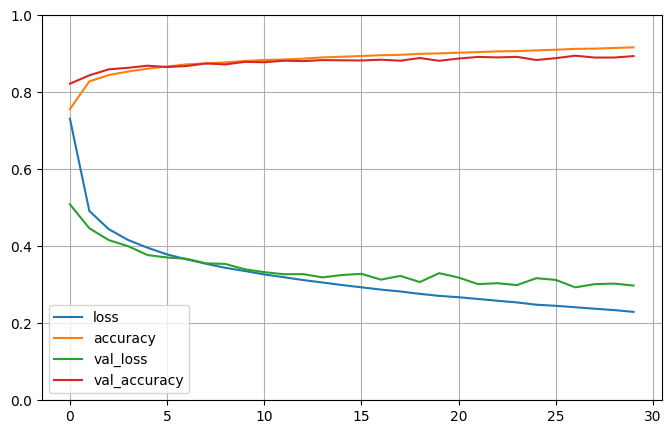

In [38]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## PLOT Analysis IMPORTANT READ CAREFULLY, ESPECIALLY SHIFTED BY HALF PART
You can see that both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. Good! Moreover, the validation curves are close to the training curves, which means that there is not too much overfitting. In this particular case, the model looks like it performed better on the validation set than on the training set at the beginning of training. But that’s not the case: indeed, the validation error is computed at the end of each epoch, while the training error is computed using a running mean during each epoch. So the training curve should be shifted by half an epoch to the left. If you do that, you will see that the training and validation curves overlap almost perfectly at the beginning of training.

### Performance Comparison
The training set performance ends up beating the validation performance, as is generally the case when you train for long enough. You can tell that the model has not quite converged yet, as the validation loss is still going down, so you should probably continue training. It’s as simple as calling the fit() method again, since Keras just continues training where it left off (you should be able to reach close to 89% validation accuracy).acy).

### Performance Improvement Tips IMPORTANT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
If you are not satisfied with the performance of your model, you should go back and tune the hyperparameters. The first one to check is the learning rate. If that doesn’t help, try another optimizer (and always retune the learning rate after changing any hyperparameter). If the performance is still not great, then try tuning model hyperparameters such as the number of layers, the number of neurons per layer, and the types of activation functions to use for each hidden layer. You can also try tuning other hyperparameters, such as the batch size (it can be set in the fit() method using the batch_size argument, which defaults to 32). Once you are satisfied with your model’s validation
accuracy, you should evaluate it on the test set to estimate the generalization error before you deploy the model to production. You can easily do this using the evaluate() method (it also supports several other arguments, such as batch_size and sample_weight;



## MODEL EVALUATION ON TEST SET

In [39]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 66.4700 - accuracy: 0.8463


[66.46995544433594, 0.8463000059127808]

## Test Set Performance Analysis
it is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set (however, in this example, we did not do any hyperparameter tuning, so the lower accuracy is just bad luck). Remember to resist the temptation to tweak the hyperparameters on the test set, or else your estimate of the generalization error will be too optimistic.

## Using the model to make predictions
Next, we can use the model’s predict() method to make predictions on new instances. Since we don’t have actual new instances, we will just use the first three instances of the test set:

In [40]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

1/1 [==============================] - 0s 127ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Prediction Performance Analysis
As you can see, for each instance the model estimates one probability per class, from class 0 to class 9. For example, for the first image it estimates that the probability of class 9 (ankle boot) is 100%. In other words, it “believes” the first image is footwear, most likely ankle boots.

#### Important Class Probability
If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the predict_classes() method instead:

In [41]:
# Not working
# y_pred = model.predict_classes(X_new)
# y_pred

In [42]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Result 
Here, the classifier actually classified all three images correctly.

# Building a Regression MLP Using the Sequential API

Let’s switch to the California housing problem and tackle it using a regression neural network. For simplicity, we will use Scikit-Learn’s fetch_california_housing() function to load the data. After loading the data, we split it into a training set, a validation set, and a test set, and we scale all the features:

In [43]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
housing = fetch_california_housing()

In [45]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [46]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

In [47]:
scaler = StandardScaler()

In [48]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Important, see in the above block, and we have discussed this earlier as well that you fit_transform only on the Training data, and not on the Validation or the Testing Data!

## The regression model

Using the Sequential API to build, train, evaluate, and use a regression MLP to make predictions is quite similar to what we did for classification. The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function, and the loss function is the mean squared error. Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting:

# Check the notebook for this chapter, "Rule of Thumb Part"

In [49]:
X_train.shape

(11610, 8)

In [50]:
X_train.shape[1:]

(8,)

In [51]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)])

In [52]:
model.compile(loss="mean_squared_error", optimizer="sgd" ,metrics=["accuracy"])

In [53]:
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8087 - accuracy: 0.0029 - val_loss: 0.5686 - val_accuracy: 0.0031
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5636 - accuracy: 0.0030 - val_loss: 0.5199 - val_accuracy: 0.0031
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4981 - accuracy: 0.0030 - val_loss: 0.4885 - val_accuracy: 0.0031
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4557 - accuracy: 0.0030 - val_loss: 0.4810 - val_accuracy: 0.0031
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4527 - accuracy: 0.0030 - val_loss: 0.4694 - val_accuracy: 0.0031
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4367 - accuracy: 0.0030 - val_loss: 0.4540 - val_accuracy: 0.0031
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4297 - accuracy: 0.0030 - val_loss: 0.4465 - val_accuracy: 0.0031
Epoch 

In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

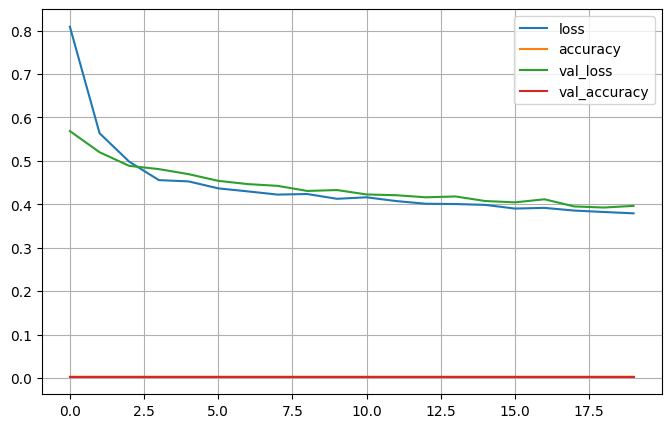

In [55]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca() # set the vertical range to [0-1]
plt.show()

In [56]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.0029


In [57]:
X_new = X_test[:3]

In [58]:
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 58ms/step


# Building Complex Models Using the Functional API  IMPORTANT!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

It is sometimes useful to build neural networks with more complex topologies, or with multiple inputs or outputs. For this purpose, Keras offers the Functional API. It connects all or part of the inputs directly to the output layer. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). The short path can also be used to provide manually engineered features to the neural network.

In contrast, a regular MLP forces all the data to flow through the full stack of layers thus, simple patterns in the data may end up being distorted by this sequence of transformations.

## Let’s build such a neural network to tackle the California housing problem:

In [59]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

### Let’s go through each line of this code:

### 1) First, we need to create an Input object. This is a specification of the kind of input the model will get, including its shape and dtype. A model may actually have multiple inputs, as we will see shortly. The input_ is the Input object 

### 2) Next, we create a Dense layer, hidden1 with 30 neurons, using the ReLU activation function. As soon as it is created, notice that we call it like a function, passing it the input_. This is why this is called the Functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet.

### 3) We then create a second hidden layer, hidden2, and again we use it as a function. Note that we pass it the output of the first hidden layer.

### 4) Next, we create a Concatenate layer, Now notice that in this concatenate layer we are giving two parameters, the input_ and the hidden2, so hence we're basically achieving our aim of simple features being passed directly from the input_ to the output and the deep patterns being passed from input_ to hidden1 then to hidden2 and finally to the output. And once again we immediately use concatenate like a function, to concatenate the input and the output of the second hidden layer. 

### 5) Then we create the output layer, with a single neuron and no activation function, and we call it like a function, passing it the result of the concatenation.

### 6) Lastly, we create a Keras Model, specifying which inputs and outputs to use.

### Building, Training and Evaluating the model

In [60]:
model.compile(loss="mean_squared_error", optimizer="sgd" ,metrics=["accuracy"])

In [61]:
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7480 - accuracy: 0.0029 - val_loss: 0.6021 - val_accuracy: 0.0031
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5705 - accuracy: 0.0030 - val_loss: 0.5415 - val_accuracy: 0.0031
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4961 - accuracy: 0.0030 - val_loss: 0.5003 - val_accuracy: 0.0031
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4967 - accuracy: 0.0030 - val_loss: 1.7908 - val_accuracy: 0.0023
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5308 - accuracy: 0.0030 - val_loss: 0.4814 - val_accuracy: 0.0031
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4711 - accuracy: 0.0030 - val_loss: 0.4744 - val_accuracy: 0.0031
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4357 - accuracy: 0.0030 - val_loss: 0.4636 - val_accuracy: 0.0031
Epoch 

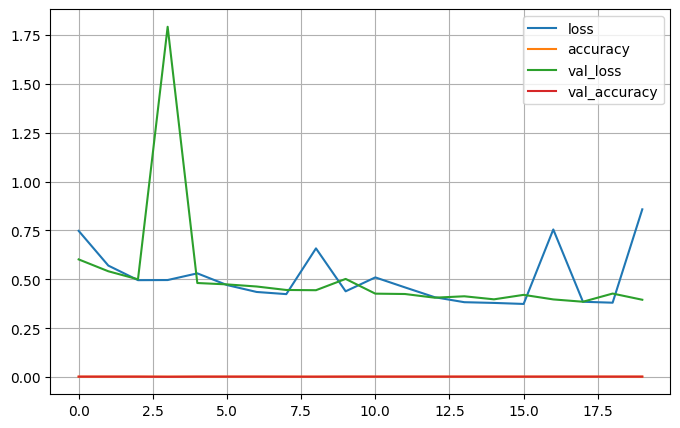

In [62]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca() # set the vertical range to [0-1]
plt.show()

In [63]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.0029


### Passing Overlapping Subsets of features through wide path and deep path

If you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path. In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7):

#### Building the model for this case

In [64]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

### Model explanation

### 1) Now we create two input objects, one that will directly go to the concatenation layer, and second one that will go through the hidden layers

### 2) Here remember to name the important layers

### Compiling the Model

Now we can compile the model as usual, but when we call the fit() method, instead of passing a single input matrix X_train, we must pass a pair of matrices (X_train_A, X_train_B): one per input. The same is true for X_valid, and also for X_test and X_new when you call evaluate() or predict():


Alternatively, you can pass a dictionary mapping the input names to the input values, like {"wide_input": X_train_A, "deep_input": X_train_B}. This is especially useful when there are many inputs, to avoid getting the order wrong.

In [65]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3),metrics=["accuracy"])

#### Creating the two subsets of dataset for input A and input B

In [66]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

#### Now, notice that we're not splitting the y_train, y_test, and of course you won't split them because your model is learning the one X_train only but just in two ways so you are not going to split the y_train, it is not going to check with two different correct values

In [67]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.6988 - accuracy: 0.0027 - val_loss: 1.0965 - val_accuracy: 0.0031
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8491 - accuracy: 0.0030 - val_loss: 0.7783 - val_accuracy: 0.0028
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7037 - accuracy: 0.0030 - val_loss: 0.7026 - val_accuracy: 0.0028
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6509 - accuracy: 0.0030 - val_loss: 0.6636 - val_accuracy: 0.0028
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6195 - accuracy: 0.0030 - val_loss: 0.6389 - val_accuracy: 0.0028
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5940 - accuracy: 0.0030 - val_loss: 0.6204 - val_accuracy: 0.0028
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5733 - accuracy: 0.0030 - val_loss: 0.5954 - val_accuracy: 0.0028
Epoch 

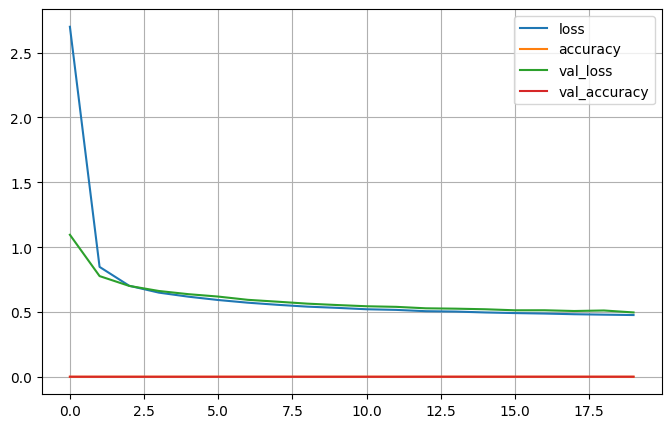

In [68]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca() # set the vertical range to [0-1]
plt.show()

In [69]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)



162/162 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.0027


In [70]:
y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 57ms/step


### Use Cases for Functional API, multi input API

### 1) The task may demand it. For instance, you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.

### 2) Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For example, you could perform multitask classification on pictures of faces, using one output to classify the person’s facial expression (smiling, surprised, etc.) and another output to identify whether they are wearing glasses or not.

### 3) Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture (see Figure 10-16) to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

#### Adding Auxiallry output mentioned in point 3 above

Adding extra outputs is quite easy: just connect them to the appropriate layers and add them to your model’s list of outputs., the following code builds the auxiallry output part.

In [71]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Each output will need its own loss function. Therefore, when we compile the model, we should pass a list of losses20 (if we pass a single loss, Keras will assume that the same loss must be used for all outputs). By default, Keras will compute all these losses and simply add them up to get the final loss used for training. We care much more about the main output than about the auxiliary output (as it is just used for regularization), so we want to give the main output’s loss a much greater weight. Fortunately, it is possible to set all the loss weights when compiling the model:

#### IMPORTANT NOTE
As mentioned before, alternatively, you can pass a dictionary that maps each output name to the corresponding loss. Just like for
the inputs, this is useful when there are multiple outputs, to avoid getting the order wrong. The loss weights
and metrics (discussed shortly) can also be set using dictionaries#### Use this in the future.

In [72]:
model.compile(loss={'main_output':"mse",'aux_output':"mse"}, loss_weights={'main_output':0.9,'aux_output':0.1}, optimizer="sgd")


Now when we train the model, we need to provide labels for each output. In this example, the main output and the auxiliary output should try to predict the same thing, so they should use the same labels. So instead of passing y_train, we need to pass (y_train, y_train) (and the same goes for y_valid and y_test):

In [73]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.9853 - main_output_loss: 0.8075 - aux_output_loss: 2.5851 - val_loss: 0.7491 - val_main_output_loss: 0.6843 - val_aux_output_loss: 1.3323
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6009 - main_output_loss: 0.5423 - aux_output_loss: 1.1279 - val_loss: 0.5769 - val_main_output_loss: 0.5222 - val_aux_output_loss: 1.0692
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5387 - main_output_loss: 0.4927 - aux_output_loss: 0.9525 - val_loss: 0.5432 - val_main_output_loss: 0.4998 - val_aux_output_loss: 0.9336
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5120 - main_output_loss: 0.4746 - aux_output_loss: 0.8487 - val_loss: 0.5179 - val_main_output_loss: 0.4826 - val_aux_output_loss: 0.8356
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5150 - main_output_loss: 0.4858 - aux_output_loss: 0.7786 - val_loss

When we evaluate the model, Keras will return the total loss, as well as all the individual losses:

In [74]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.3870 - main_output_loss: 0.3732 - aux_output_loss: 0.5106


Similarly, the predict() method will return predictions for each output:

In [75]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 60ms/step


# Using the Subclassing API to Build Dynamic Models

When we evaluate the model, Keras will return the total loss, as well as all the individual losses:Both the Sequential API and the Functional API are declarative: you start by declaring which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training or inference. This has many advantages: the model can easily be saved, cloned, and shared; its structure can be displayed and analyzed; the framework can infer shapes and check types, so errors can be caught early (i.e., before any data ever goes through the model). It’s also fairly easy to debug, since the whole model is a static graph of layers. But the flip side is just that: it’s static. Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if you prefer a more imperative programming style, the Subclassing API is for you

#### Refer the code for this in the txtbook

This extra flexibility does come at a cost: your model’s architecture is hidden within the call() method, so Keras cannot easily inspect it; it cannot save or clone it; and when you call the summary() method, you only get a list of layers, without any information on how they are connected to each other. Moreover, Keras cannot check types and shapes ahead of time, and it is easier to make mistakes. So unless you really need that extra flexibility, you should probably stick to the Sequential API or the Functional API.

## IMPORTANT Keras models can be used just like regular layers, so you can easily combine them to build complex architectures..


# Saving and Restoring a Model

## SAVING

In [76]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [77]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full)

In [78]:
scaler = StandardScaler()


In [79]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [80]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)])

In [81]:
model.compile(loss="mean_squared_error", optimizer="sgd" ,metrics=["accuracy"])

In [82]:
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7796 - accuracy: 0.0025 - val_loss: 0.5385 - val_accuracy: 0.0026
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5147 - accuracy: 0.0027 - val_loss: 0.4827 - val_accuracy: 0.0026
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4844 - accuracy: 0.0027 - val_loss: 0.4808 - val_accuracy: 0.0026
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4658 - accuracy: 0.0026 - val_loss: 0.4503 - val_accuracy: 0.0026
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4565 - accuracy: 0.0026 - val_loss: 0.4459 - val_accuracy: 0.0026
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4482 - accuracy: 0.0026 - val_loss: 0.4352 - val_accuracy: 0.0023
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4422 - accuracy: 0.0026 - val_loss: 0.4309 - val_accuracy: 0.0023
Epoch 

In [83]:
model.save("my_keras_model.keras")

Keras will use the HDF5 format(HDF5 is legacy now, it saves using .keras) to save both the model’s architecture (including every
layer’s hyperparameters) and the values of all the model parameters for every layer
(e.g., connection weights and biases). It also saves the optimizer (including its hyper‐
parameters and any state it may have).

## RESTORING

In [84]:
model = keras.models.load_model("my_keras_model.keras")

### WARNING
This will work when using the Sequential API or the Functional API, but unfortunately not when using model subclassing. You can use save_weights() and load_weights() to at least save and restore the model parameters, but you will need to save and restore everything else yourself

# Using Callbacks

what if training lasts several hours? This is quite common, especially when training on large datasets. In this case, you should not only save your model at the end of training, but also save checkpoints at regular intervals during training, to avoid losing everything if your computer crashes. But how can you tell the fit() method to save checkpoints? Use callbacks.

### IMPORTANT Callback working
The fit() method accepts a callbacks argument that lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch. For example, the ModelCheckpoint callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch:

In [85]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4049 - accuracy: 0.0027
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4003 - accuracy: 0.0027
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3931 - accuracy: 0.0027
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4163 - accuracy: 0.0027
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5664 - accuracy: 0.0027
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4283 - accuracy: 0.0027
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4025 - accuracy: 0.0027
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3966 - accuracy: 0.0027
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3940 - accuracy: 0.0027
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3896 - accuracy: 0.0027

### SAVING BEST MODEL IMPORTANT!!!!!
Moreover, if you use a validation set during training, you can set save_best_only=True when creating the ModelCheckpoint. In this case, it will only save your model when its performance on the validation set is the best so far. This way, you do not need to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model on the validation set. The following code is a simple way to implement early stopping

In [86]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_best_model.keras", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_best_model.keras")

Epoch 1/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3860 - accuracy: 0.0027 - val_loss: 0.3827 - val_accuracy: 0.0026
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3845 - accuracy: 0.0027 - val_loss: 0.3879 - val_accuracy: 0.0026
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3819 - accuracy: 0.0027 - val_loss: 0.3773 - val_accuracy: 0.0026
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3796 - accuracy: 0.0027 - val_loss: 0.3804 - val_accuracy: 0.0026
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.3779 - accuracy: 0.0027 - val_loss: 0.3767 - val_accuracy: 0.0026
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3757 - accuracy: 0.0027 - val_loss: 0.3762 - val_accuracy: 0.0026
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3737 - accuracy: 0.0027 - val_loss: 0.3727 - val_accuracy: 0.0026
Epoch 

### EARLY STOPPING !!!!IMPORTANT!!!!!!
Another way to implement early stopping is to simply use the EarlyStopping callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the patience argument), and it will optionally rollback to the best model. You can combine both callbacks to save checkpoints of your model (in case your computer crashes) and interrupt training early when there is no more progress (to avoid wasting time and resources):

In [87]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3693 - accuracy: 0.0027 - val_loss: 0.3759 - val_accuracy: 0.0026
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3781 - accuracy: 0.0027 - val_loss: 0.3734 - val_accuracy: 0.0026
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3684 - accuracy: 0.0027 - val_loss: 0.3703 - val_accuracy: 0.0026
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3680 - accuracy: 0.0027 - val_loss: 0.3710 - val_accuracy: 0.0026
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3632 - accuracy: 0.0027 - val_loss: 0.3628 - val_accuracy: 0.0026
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3612 - accuracy: 0.0027 - val_loss: 0.3688 - val_accuracy: 0.0026
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3614 - accuracy: 0.0027 - val_loss: 0.3637 - val_accuracy: 0.0026

### CUSTOM CALLBACKS
As you might expect, you can implement on_train_begin(), on_train_end(), on_epoch_begin(), on_epoch_end(), on_batch_begin(), and on_batch_end(). Callbacks can also be used during evaluation and predictions, should you ever need them (e.g., for debugging). For evaluation, you should implement on_test_begin(), on_test_end(), on_test_batch_begin(), or on_test_batch_end() (called by evaluate()), and for prediction you should implement on_predict_begin(), on_predict_end(), on_predict_batch_begin(), or on_predict_batch_end() (called by predict()).

# Using TensorBoard for Visualization

TensorBoard is a great interactive visualization tool that you can use to view the learning curves during training, compare learning curves between multiple runs, visualize the computation graph, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and automatically clustered for you, and more! This tool is installed automatically when you install TensorFlow, so you already have it.

## Creating Directories for logging

To use TensorBoard, you must modify your program so that it outputs the data you want to visualize to special binary log files called event files. Each binary data record is called a summary. The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations: this allows you to visualize live data (with a short delay), such as the learning curves during training. In general, you want to point the TensorBoard server to a root log directory and configure your program so that it writes to a different subdirectory every time it runs. This way, the same TensorBoard server instance will allow you to visualize and compare data from multiple runs of your program, without getting everything mixed up

Let’s start by defining the root log directory we will use for our TensorBoard logs, plus a small function that will generate a subdirectory path based on the current date and time so that it’s different at every run. You may want to include extra information in the log directory name, such as hyperparameter values that you are testing, to make it easier to know what you are looking at in TensorBoard:

In [88]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [89]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    ff = 25
    return os.path.join(root_logdir,run_id)

In [90]:
run_logdir = get_run_logdir()

In [91]:
ff = 10

#### The good news is that Keras provides a nice TensorBoard() callback:

In [92]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3294 - accuracy: 0.0027 - val_loss: 0.3420 - val_accuracy: 0.0023
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3382 - accuracy: 0.0027 - val_loss: 0.3401 - val_accuracy: 0.0026
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3297 - accuracy: 0.0027 - val_loss: 0.3360 - val_accuracy: 0.0023
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.0027 - val_loss: 0.3380 - val_accuracy: 0.0023
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3273 - accuracy: 0.0027 - val_loss: 0.3349 - val_accuracy: 0.0023
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3275 - accuracy: 0.0027 - val_loss: 0.3352 - val_accuracy: 0.0026
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3263 - accuracy: 0.0027 - val_loss: 0.3438 - val_accuracy: 0.0023
Epoch 

### Starting the TensorBoard server

In [103]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [104]:
%tensorboard --logdir=./my_logs --port=6006

In [102]:
!kill 28636

'kill' is not recognized as an internal or external command,
operable program or batch file.


#### Additional APIs Important!!
Additionally, TensorFlow offers a lower-level API in the tf.summary package. The following code creates a SummaryWriter using the create_file_writer() function, and it uses this writer as a context to log scalars, histograms, images, audio, and text, all of which can then be visualized using TensorBoard (give it a try!):

In [95]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)

In [96]:
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000,step= step)

# Fine-Tuning Neural Network Hyperparameters

The flexibility of neural networks is also one of their main drawbacks: there are many hyperparameters to tweak. Not only can you use any imaginable network architecture, but even in a simple MLP you can change the number of layers, the number of neurons per layer, the type of activation function to use in each layer, the weight initialization logic, and much more. How do you know what combination of hyperparameters is the best for your task?

# IMPORTANT!!!!!!!!!!!!!!!!!!!!!!!!!!!!! REFER NOTEBOOK HYPERPARAMETER PART